<a href="https://colab.research.google.com/github/Hanzee23/Convolution-Neural-Netwrok-using-Keras/blob/main/MNIST_CNN_Keras_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CNN Model using Keras.

This notebook is associated with implementation of cnn model using keras. The model is trained and tested upon MNIST data set.

Below is the list of performed steps in achieving the working CNN Model:

* Import Data
* Preprocess Data
    1. Refactorization
    2. Normalization
* Model Structure
    1. Convolation Layer
    2. Pooling Layer
* Model Training
* Model Testing
* Model Status

*Before working with code its highly recommended to view read me file*


In [1]:
# Import libraries for various useful utilities

import keras
import numpy as np

# *Checkpoint A*

Checkpoint after importing all the desired Packages and Libraries.

Steps for next checkpoint.
1. Load Data
2. Normalize input dataset samples accross the board.
3. Make one hot encoded vector.

In [2]:
from keras.utils import to_categorical

# Load_Data function, loads the required mnist dataset for model training and testing,
# while also performing data preprocessing for model compatiblity.

def Load_Data():

  # Download and load MNIST Dataset from keras builtin datasets
  ( Train_X, Train_Y ), ( Test_X, Test_Y ) = keras.datasets.mnist.load_data()

  # Reshape Dataset to have one single channel
  Train_X = Train_X.reshape( Train_X.shape[0], 28, 28, 1 )
  Test_X = Test_X.reshape( Test_X.shape[0], 28, 28, 1 )

  # Normalize input datasamples within range [0-1]
  Train_X = ( Train_X.astype('float32') ) / 225.0
  Test_X = ( Test_X.astype('float32') ) / 225.0

  # Make one hot encoded verctor for true labels
  Train_Y = to_categorical( Train_Y )
  Test_Y = to_categorical( Test_Y )

  # Return Preprocessed Data
  return ( Train_X, Train_Y ), ( Test_X, Test_Y )

In [3]:
# This code block is for testing above code snippet

( Train_X, Train_Y ), ( Test_X, Test_Y ) = Load_Data()

print( Train_X.shape, Train_Y.shape )
print( Test_X.shape, Test_Y.shape )

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


# *Checkpoint B*

Checkpoint after loading the dataset and performing all required data pre-processing steps on MNIST Dataset.

Steps for next checkpoint:
1. keras sequential model creation

In [4]:
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

# ML_Model function, returns keras sequential cnn model,
# which consists of defined layers and model attributes.

def ML_Model( ):

  model = keras.Sequential()    # Creates keras sequential model object.

  model.add( layers.Input( shape = Train_X[0].shape ) )   # Adds Input layer defining the shape of provided input.

  # Adds first convolution layer having 10 different filters each of size 3x3x1 and max pool layer of size 2x2x1,
  # where stride is one for both
  model.add( layers.Conv2D( 10, (3, 3), activation = "relu", use_bias = True, kernel_initializer = "he_uniform" ) )
  model.add( layers.MaxPooling2D( (2, 2), (1, 1), padding = "valid" ) )

  # Adds second convolution layer having 10 different filters each of size 2x2x1 and max pool layer of size 2x2x1,
  # where stride is one for both
  model.add( layers.Conv2D( 10, (2, 2), activation = "relu", use_bias = True, kernel_initializer = "he_uniform" ) )
  model.add( layers.MaxPooling2D( (2, 2), (1, 1), padding = "valid" ) )

  # Extend the output from previous layer.
  model.add( layers.Flatten( ) )

  # Adds a fully connected layer, having 15 neurons.
  model.add( layers.Dense( 15, activation = "relu", use_bias = True, kernel_initializer = "he_normal" ) )

  # Adds second fully connected layer, having 10 neurons, which will predict data.
  model.add( layers.Dense( 10, activation = "softmax", use_bias = True, kernel_initializer = "he_normal" ) )

  # Select desired optimizer and loss for model.
  m_optim = optimizers.SGD( learning_rate = 0.01 )
  m_loss = losses.CategoricalCrossentropy( )

  # Complie your built model for training and testing.
  model.compile( m_optim, m_loss, metrics = [ "accuracy" ] )

  # Return the constructed model.
  return model

In [5]:
# This code snippet is used to view model summary

myModel = ML_Model()
myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        410       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 10)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5290)              0         
                                                                 
 dense (Dense)               (None, 15)                7

# *Checkpoint C*

Checkpoint after keras sequential cnn model creation and verification.

Steps for next checkpoint:
1. Training the model
2. Testing the model

In [6]:
# Train complied model on provided training dataset, in defined batch_size ( 32 by default ) and epohs

history = myModel.fit( Train_X, Train_Y, epochs = 5 )
print( history.history )    # returns dictionary containing info of loss and specified metrics, for defined number of epochs

Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.5205 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1515 - accuracy: 0.9562
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1088 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0899 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0773 - accuracy: 0.9771
{'loss': [0.5205417275428772, 0.1515393704175949, 0.10884518176317215, 0.089863620698452, 0.07727882266044617], 'accuracy': [0.8269333243370056, 0.9562000036239624, 0.9678999781608582, 0.9736166596412659, 0.9770833253860474]}


In [7]:
# Test complied model on given testing dataset and generate results of model performance

results = myModel.evaluate( Test_X, Test_Y )
print( results )    # returns loss and value for specified metrics

313/313 [==============================] - 3s 10ms/step - loss: 0.0815 - accuracy: 0.9748
[0.08148972690105438, 0.9747999906539917]


# *Checkpoint D*
Checkpoint after model training and testing

Steps for next Checkpoint:
1. Evaluate and print model status *( like accuracy, predictions )*
2. Visualization of the model prediction via graph *( if possible )*

In [8]:
# Ask model to generante predictions on completetly annonymous data sample.

predictions = myModel.predict( Train_X[ :10 ] )     # Selecting first 10 sample from train data for testing model predictions
true_label = [ np.argmax( sample ) for sample in Train_Y ]    # Extracting true labels of selected data sampels

max_score = np.max( predictions, axis = 1 )       # maximum score for specific class (prediction)
pred_label = np.argmax( predictions, axis = 1 )   # label of predicted class

for res in range( 10 ):
  print( "Serial No. ", ( res + 1 ), "\nMax Score: ", max_score[res], "\nPredicted Label: ", pred_label[res], "\nTrue Label: ", true_label[res], end = "\n\n" )

1/1 [==============================] - 0s 119ms/step
Serial No.  1 
Max Score:  0.8091997 
Predicted Label:  5 
True Label:  5

Serial No.  2 
Max Score:  0.99965084 
Predicted Label:  0 
True Label:  0

Serial No.  3 
Max Score:  0.9990631 
Predicted Label:  4 
True Label:  4

Serial No.  4 
Max Score:  0.99912727 
Predicted Label:  1 
True Label:  1

Serial No.  5 
Max Score:  0.99609965 
Predicted Label:  9 
True Label:  9

Serial No.  6 
Max Score:  0.99990934 
Predicted Label:  2 
True Label:  2

Serial No.  7 
Max Score:  0.99971104 
Predicted Label:  1 
True Label:  1

Serial No.  8 
Max Score:  0.9997847 
Predicted Label:  3 
True Label:  3

Serial No.  9 
Max Score:  0.9970458 
Predicted Label:  1 
True Label:  1

Serial No.  10 
Max Score:  0.9993168 
Predicted Label:  4 
True Label:  4



# *Data Sample Display*

* The following code help achieve pictorial  view of few selected samples from train and test dataset samples.

* The following code is not responsible for model creation, training and testing.

* The following code is just for help and understanding purposes.

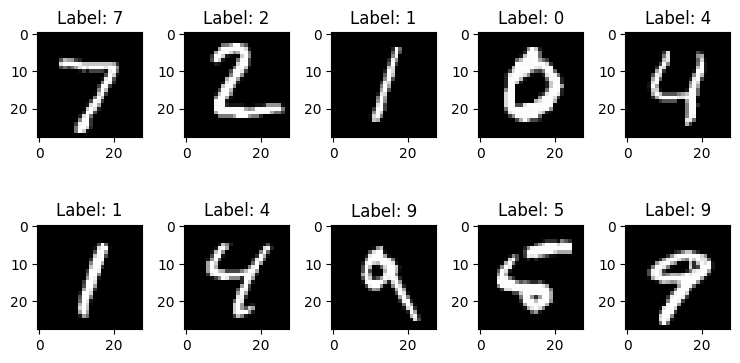

In [9]:
# Following code is direct copied from a source, the code displays first 10 images of test dataset.

# importing utilites
import matplotlib.pyplot as plt
%matplotlib inline

# graph object selections
num = 10
images = Test_X[:10]
labels = Test_Y[:10]

labels = [ np.argmax(label) for label in labels ]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

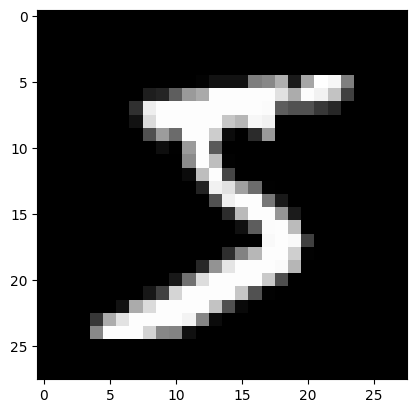

In [10]:
# Following code is directly copied from a source and display only one selected image

train_sample = Train_X[0].copy()  # selecting any random datset sample

# display the selected image
fig = plt.figure
plt.imshow( train_sample, cmap = 'gray' )
plt.show()